In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,precision_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = pd.read_csv(r'C:\Users\krunal sheth\Downloads\insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# df.drop(['region'],axis = 1, inplace = True)

In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
df.drop_duplicates(inplace = True)

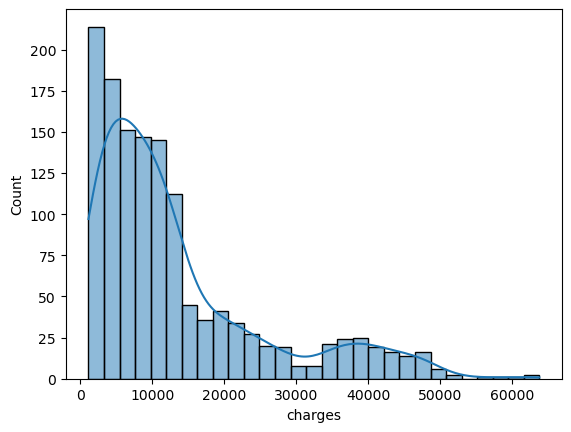

In [9]:
sns.histplot(data = df, x = 'charges' ,kde = True)
plt.show()

In [10]:
#df["log_charges"] = np.log(df["charges"])

In [11]:
#df["log_charges"]

In [12]:
#sns.histplot(data = df, x = df["log_charges"] ,kde = True)
#plt.show()

In [13]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [14]:
for col in df.columns:
    if df[col].dtypes == 'object':
        print (f'{col} unique values {df[col].unique()}')

sex unique values ['female' 'male']
smoker unique values ['yes' 'no']
region unique values ['southwest' 'southeast' 'northwest' 'northeast']


In [15]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object':
        print (f'{col} unique values {df[col].unique()}')
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        print(f'{col} encoded values {df[col].unique()}')


sex unique values ['female' 'male']
sex encoded values [0 1]
smoker unique values ['yes' 'no']
smoker encoded values [1 0]
region unique values ['southwest' 'southeast' 'northwest' 'northeast']
region encoded values [3 2 1 0]


In [16]:
df['region'].unique()

array([3, 2, 1, 0])

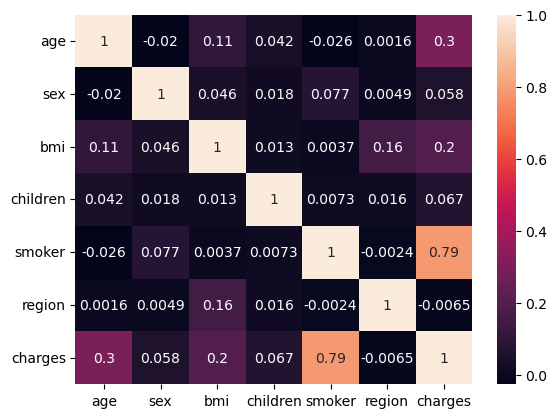

In [17]:
sns.heatmap(df.corr(),annot = True)
plt.show()

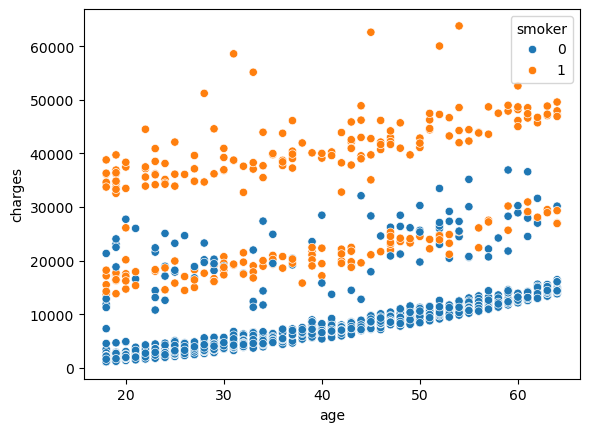

In [18]:
sns.scatterplot(data = df, x = 'age',y = 'charges',hue = 'smoker')
plt.show()

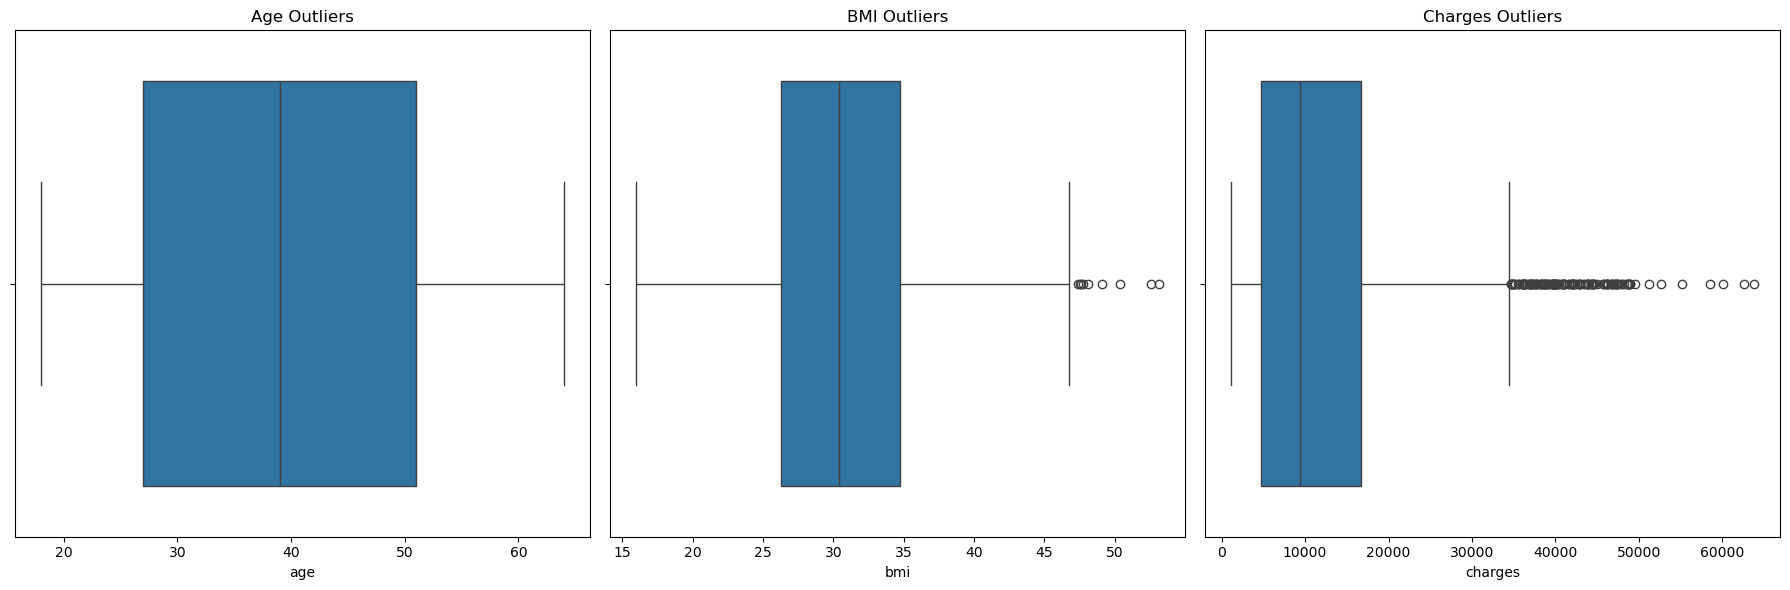

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(data=df, x='age', ax=axes[0])
sns.boxplot(data=df, x='bmi', ax=axes[1])
sns.boxplot(data=df, x='charges', ax=axes[2])
axes[0].set_title('Age Outliers')
axes[1].set_title('BMI Outliers')
axes[2].set_title('Charges Outliers')
plt.tight_layout()
plt.show()

In [20]:
df.describe()
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

outliers = ((df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR))).sum()
outliers

age           0
sex           0
bmi           9
children      0
smoker      274
region        0
charges     139
dtype: int64

In [21]:
def cap_outliers(df, column, lower=0.01, upper=0.99):
    lower_val = df[column].quantile(lower)
    upper_val = df[column].quantile(upper)
    df[column] = df[column].clip(lower_val, upper_val)
    return df

df_capped = cap_outliers(df, 'charges')

In [22]:
def cap_outliers(df, column, lower=0.01, upper=0.99):
    lower_val = df[column].quantile(lower)
    upper_val = df[column].quantile(upper)
    df[column] = df[column].clip(lower_val, upper_val)
    return df

df_capped = cap_outliers(df, 'bmi')

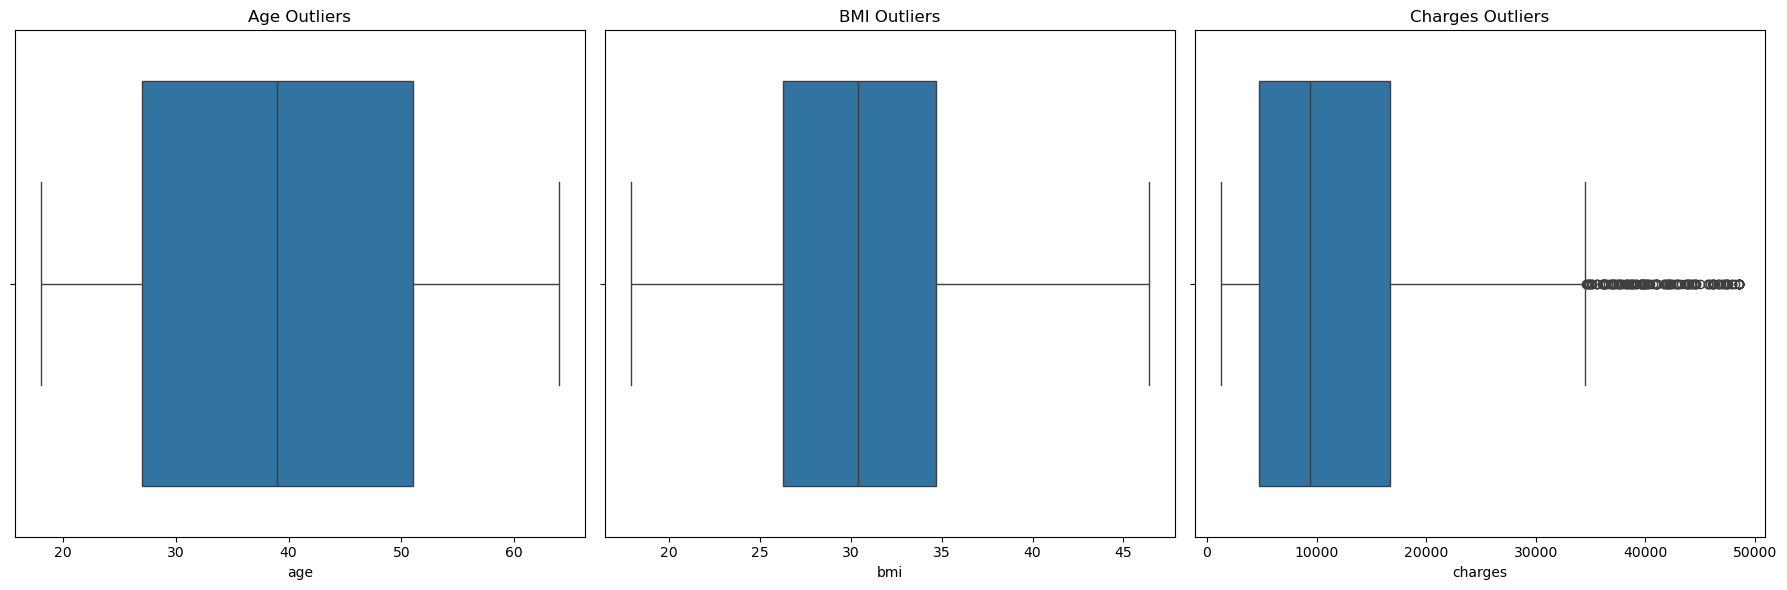

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(data=df, x='age', ax=axes[0])
sns.boxplot(data=df, x='bmi', ax=axes[1])
sns.boxplot(data=df, x='charges', ax=axes[2])
axes[0].set_title('Age Outliers')
axes[1].set_title('BMI Outliers')
axes[2].set_title('Charges Outliers')
plt.tight_layout()
plt.show()

# modelling

In [24]:
x = df.drop('charges',axis = 1)
y = df['charges']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((935, 6), (935,), (402, 6), (402,))

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled_train = scaler.fit_transform(x_train)
x_scaled_test = scaler.transform(x_test)

# Linear Regression

In [26]:
lr = LinearRegression()
lr.fit(x_scaled_train,y_train)

LinearRegression()

In [27]:
print('Training score',lr.score(x_scaled_train,y_train))
print('Testing score',lr.score(x_scaled_test , y_test))

Training score 0.7384668274825162
Testing score 0.787691176117355


In [28]:
lr_pred = lr.predict(x_scaled_test)
#lr_pred = np.expm1(y_pred_log)
#y_test_orig = np.expm1(y_test)

In [29]:
print('MAE:',mean_absolute_error(y_test,lr_pred))
print('MSE:',mean_squared_error(y_test,lr_pred))
print('R2 score:',r2_score(y_test,lr_pred))

MAE: 4059.7884753233875
MSE: 34077743.1946187
R2 score: 0.787691176117355


# RandomForest

In [30]:
rf = RandomForestRegressor(random_state=42)
rf.fit(x_scaled_train,y_train)

RandomForestRegressor(random_state=42)

In [31]:
print('Training score',rf.score(x_scaled_train,y_train))
print('Testing score',rf.score(x_scaled_test , y_test))

Training score 0.9748391447966204
Testing score 0.8719903751815854


In [32]:
rf_pred = rf.predict(x_scaled_test)
#rf_pred = np.expm1(y_pred_log)
#y_test_orig = np.expm1(y_test)

In [33]:
print('MAE:',mean_absolute_error(y_test,rf_pred))
print('MSE:',mean_squared_error(y_test,rf_pred))
print('R2 score:',r2_score(y_test,rf_pred))

MAE: 2485.402588022488
MSE: 20546857.361956365
R2 score: 0.8719903751815854


# Catboost

In [34]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor(
    iterations=1500,
    learning_rate=0.08,
    depth=3,
    loss_function='MAE',  # directly minimizes MAE
    verbose= 100)

cat.fit(x_scaled_train, y_train)

0:	learn: 7601.5531655	total: 141ms	remaining: 3m 31s
100:	learn: 2202.8645286	total: 208ms	remaining: 2.88s
200:	learn: 1672.9282309	total: 274ms	remaining: 1.77s
300:	learn: 1570.8860881	total: 340ms	remaining: 1.35s
400:	learn: 1540.7821571	total: 408ms	remaining: 1.12s
500:	learn: 1511.8917200	total: 476ms	remaining: 949ms
600:	learn: 1476.4042296	total: 549ms	remaining: 821ms
700:	learn: 1450.0215901	total: 624ms	remaining: 712ms
800:	learn: 1426.9037809	total: 694ms	remaining: 606ms
900:	learn: 1418.2988755	total: 766ms	remaining: 509ms
1000:	learn: 1403.2655728	total: 832ms	remaining: 415ms
1100:	learn: 1393.6957279	total: 918ms	remaining: 333ms
1200:	learn: 1387.7397178	total: 1.01s	remaining: 252ms
1300:	learn: 1377.9936899	total: 1.1s	remaining: 169ms
1400:	learn: 1372.0132856	total: 1.17s	remaining: 83ms
1499:	learn: 1368.5513369	total: 1.24s	remaining: 0us


In [35]:
cat_pred = cat.predict(x_scaled_test)
#cat_pred = np.expm1(y_pred_log)
#y_test_orig = np.expm1(y_test)

In [36]:
print('MAE:',mean_absolute_error(y_test,cat_pred))
print('MSE:',mean_squared_error(y_test,cat_pred))
print('R2 score:',r2_score(y_test,cat_pred))

MAE: 1486.682454179586
MSE: 19475990.18255242
R2 score: 0.878662018608656


# save model

In [37]:
with open('insurance.pkl', 'wb') as f:
    pickle.dump({'model': cat, 'scaler': scaler}, f)

# lightgbm

In [38]:
from lightgbm import LGBMRegressor
gbm = LGBMRegressor()
gbm.fit(x_scaled_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 935, number of used features: 6
[LightGBM] [Info] Start training from score 13020.723620


LGBMRegressor()

In [39]:
gb_pred = gbm.predict(x_scaled_test)

In [40]:
print('MAE:',mean_absolute_error(y_test,gb_pred))
print('MSE:',mean_squared_error(y_test,gb_pred))
print('R2 score:',r2_score(y_test,gb_pred))

MAE: 2600.812796315326
MSE: 20339508.573319066
R2 score: 0.8732821854167194


In [41]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


In [42]:
pre = scaler.transform([[32,1,28.880,0,0,1]])
pre

C:\Users\krunal sheth\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.50097615,  0.95502117, -0.29014672, -0.90578906, -0.51167213,
        -0.48235564]])

In [43]:
cat.predict(pre)

array([3907.06147959])

In [46]:
pre1 = scaler.transform([[33,1,22.705,0,0,1]])
pre1

C:\Users\krunal sheth\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.42950641,  0.95502117, -1.33085602, -0.90578906, -0.51167213,
        -0.48235564]])

In [47]:
cat.predict(pre1)

array([4090.84265305])

In [49]:
pre2 = scaler.transform([[60,0,25.840,0,0,1]])
pre2

C:\Users\krunal sheth\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 1.50017668, -1.0470972 , -0.80249591, -0.90578906, -0.51167213,
        -0.48235564]])

In [50]:
cat.predict(pre2)

array([13015.86036654])

# DecisionTreeRegressor

In [51]:
dt = DecisionTreeRegressor()
dt.fit(x_scaled_train,y_train)

DecisionTreeRegressor()

In [52]:
dt_pred = dt.predict(x_scaled_test)

In [53]:
print('MAE:',mean_absolute_error(y_test,dt_pred))
print('MSE:',mean_squared_error(y_test,dt_pred))
print('R2 score:',r2_score(y_test,dt_pred))

MAE: 2912.683975042289
MSE: 39538173.09676722
R2 score: 0.7536719793707275
